# LIF Model
In this notebook, we use the following update rule in order to simulate a
single neuron with $LIF$ model.

$u(t+\Delta) = u(t) - \Delta/\tau[(u(t) - u_r) - R.I(t)]$

In [1]:
import sys
sys.path.append('..')
import numpy as np
from cnsproject.plotting.plotting import time_plot, fi_curve
from cnsproject.utils import run_simulation_with_params

In [2]:
# Initializing the simulation variables
iters = 1000
zero_percent = 2
save_monitor_states = True
monitor_vars = ["potential", "s", "u_rest", "threshold", "in_current", "tau"]

**neuron_params_1 and neuron_params_2 are experimenting the effect of u_rest and threshold**

Note: $\sigma_n$ represents the standard deviation of the added noise.

## Simulation with neuron_params_1
$\tau = 20$, 
$|u_r - threshold| = 5mV$

### Without noise:

In [3]:
step_currents = np.linspace(4, 16, 13, dtype=np.float32)
neuron_params_1 = {'threshold': -55, 'u_rest': -60, 'tau': 20}
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_1,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=zero_percent
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 3.739s
Currents: [ 4.  6.  8. 10. 12. 14. 16.]
frequencies: [  0  29  50  71  91 110 124]


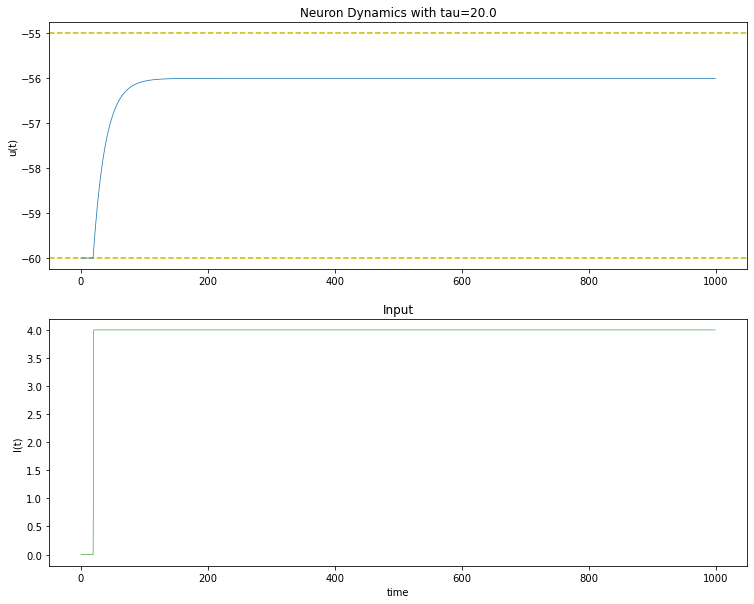

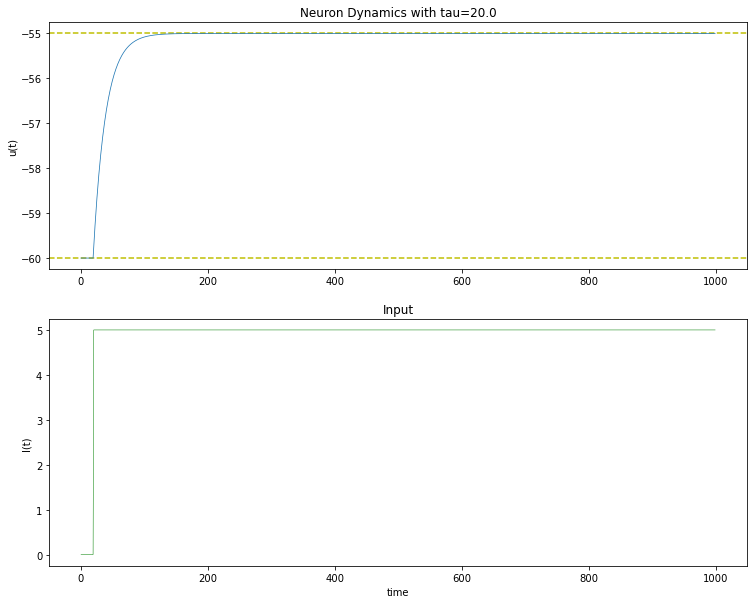

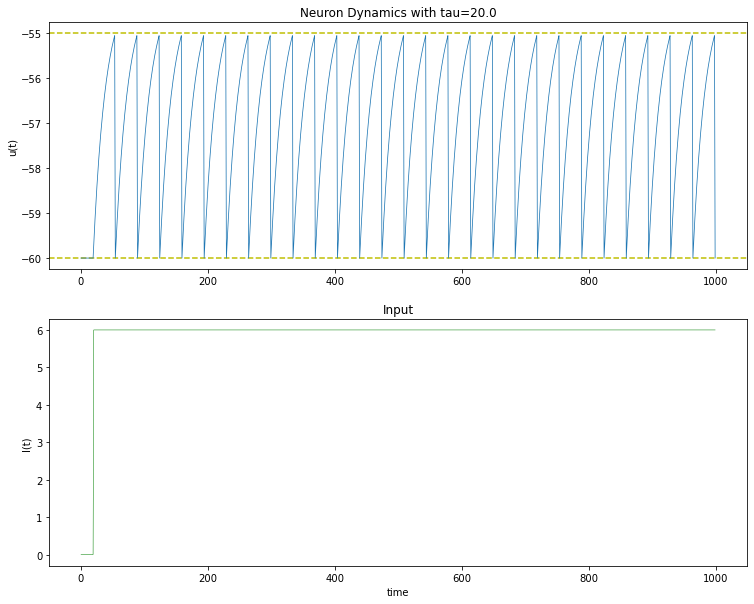

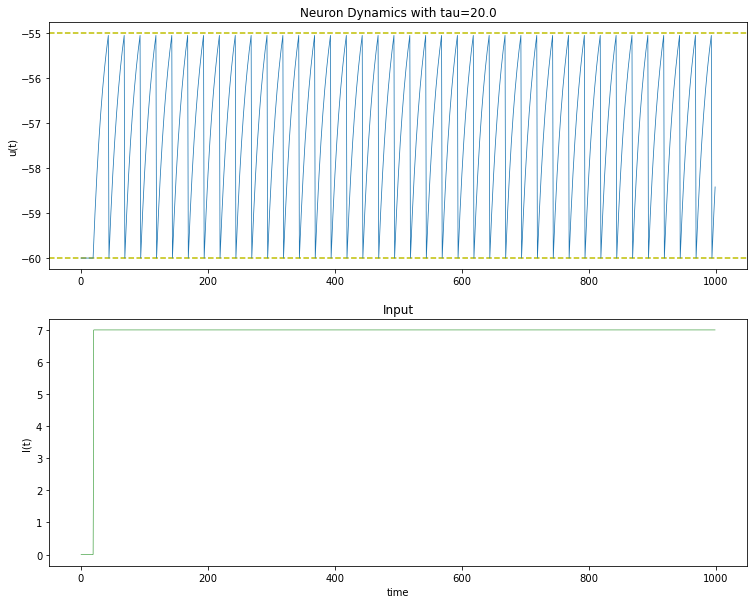

In [4]:
%matplotlib inline
if save_monitor_states:
    for i in range(4):
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor)

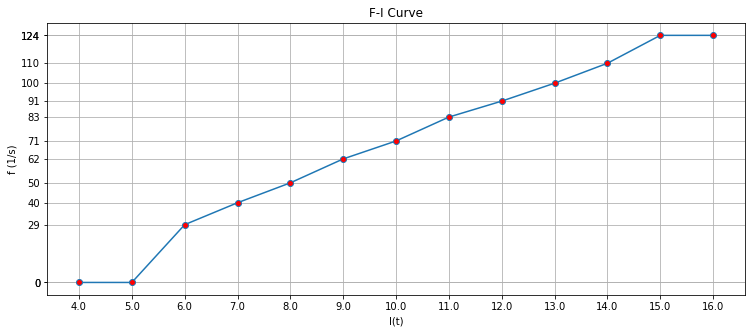

In [5]:
%matplotlib inline
fi_curve(currents, frequencies)

According to the update rule: $u(t+\Delta) = u(t) - \Delta/\tau[(u(t) - u_r) - R.I(t)]$
$R.I(t)$ should be greater than $(threshold - u_r)$ before
we can see any spike in the neuron's output. This is due to the fact that
the output of $[(u(t) - u_r) - R.I(t)]$ should be lower than $0$ in order for
the $u(t)$ to increase. Now, suppose the opposite; by increasing $u(t)$, $u(t)-u_r$ will be
greater than $R.I(t)$ for some $u(t) < threshold$, therefore, $u(t)$ will not increase
to reach to the threshold, so we do not get a spike. You can see this effect in the second plot
above, where $R.I(t)=|threshold - u_r|$. In this case, $u(t)$ gets very close to  $threshold$ but cannot reach it.

### With noise: $\sigma_n = 1.5$
The inputs are linear (after some zero in the beginning), with a $slope=5*10^{-4}$.
Lines with different base values are used for simulation.
You can see the implementation at **utils.create_line**.

In [6]:
step_currents = np.linspace(4, 8, 5, dtype=np.float32)
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_1,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=zero_percent,
        line_slop=5e-4,
        noise_std=1.5
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 1.537s
Currents: [4. 6. 8.]
frequencies: [ 1 32 52]


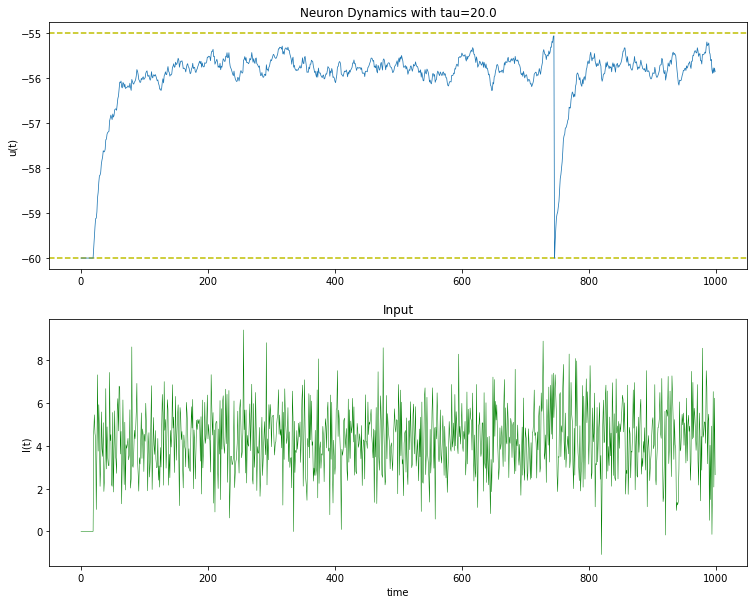

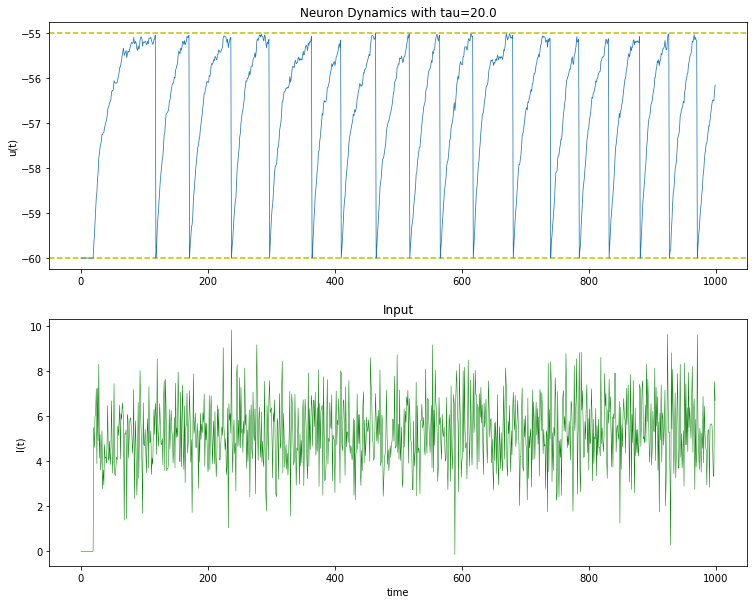

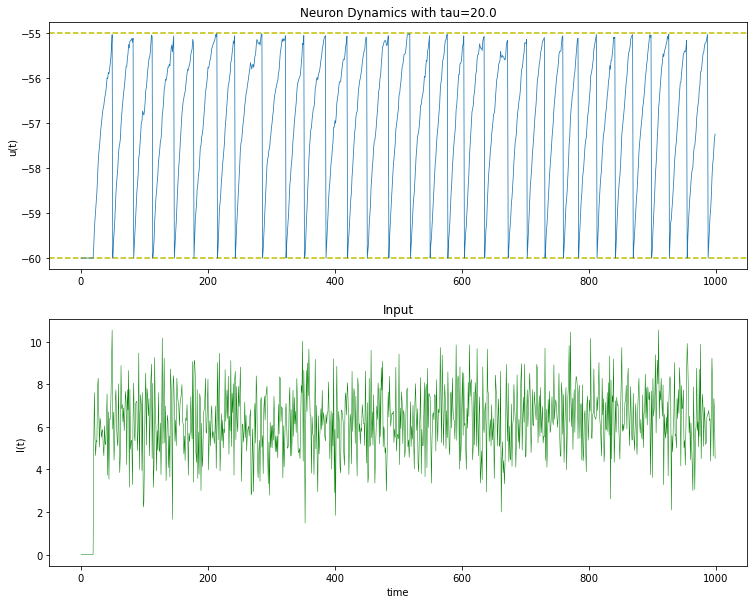

In [7]:
%matplotlib inline
if save_monitor_states:
    for i in range(0, len(monitor_states) - 2):
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor)

### With noise: $\sigma_n = 3$
Here, we use inputs with smaller base value to better see the effect of higher noise.

In [8]:
step_currents = np.linspace(2, 6, 5, dtype=np.float32)
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_1,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=zero_percent,
        line_slop=5e-4,
        noise_std=3
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 1.742s
Currents: [2. 4. 6.]
frequencies: [ 0  3 31]


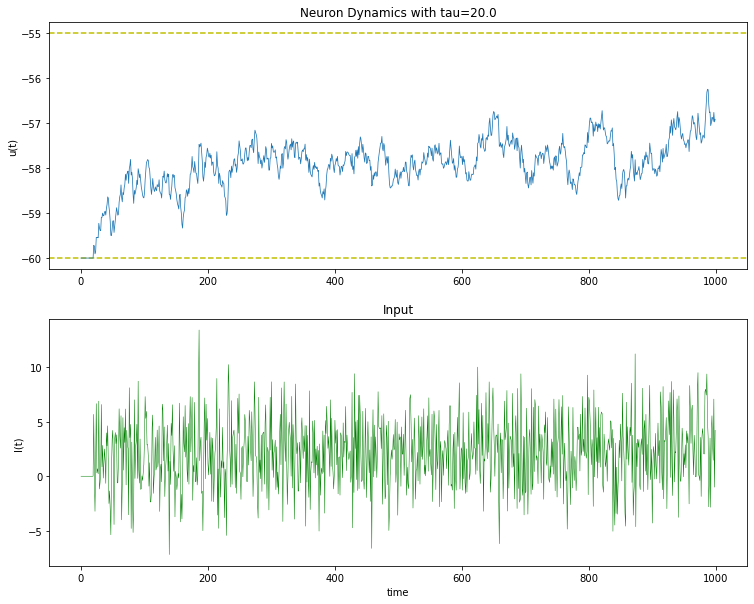

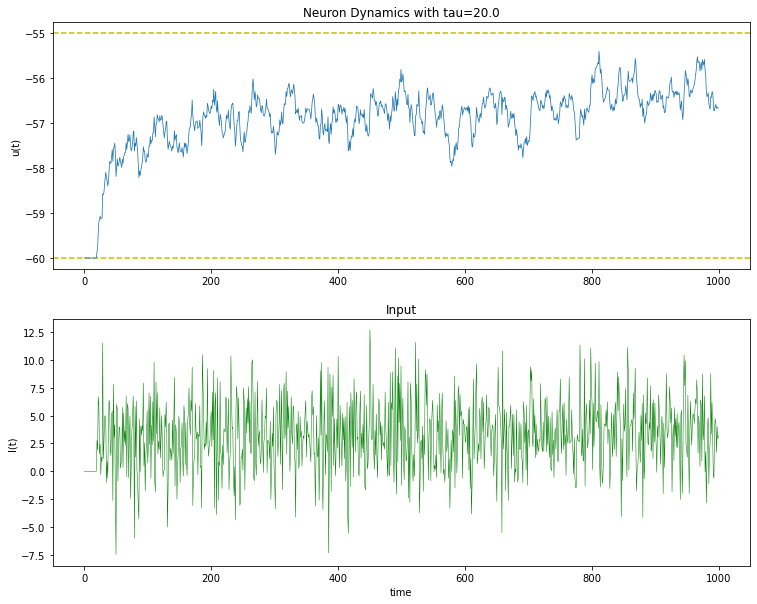

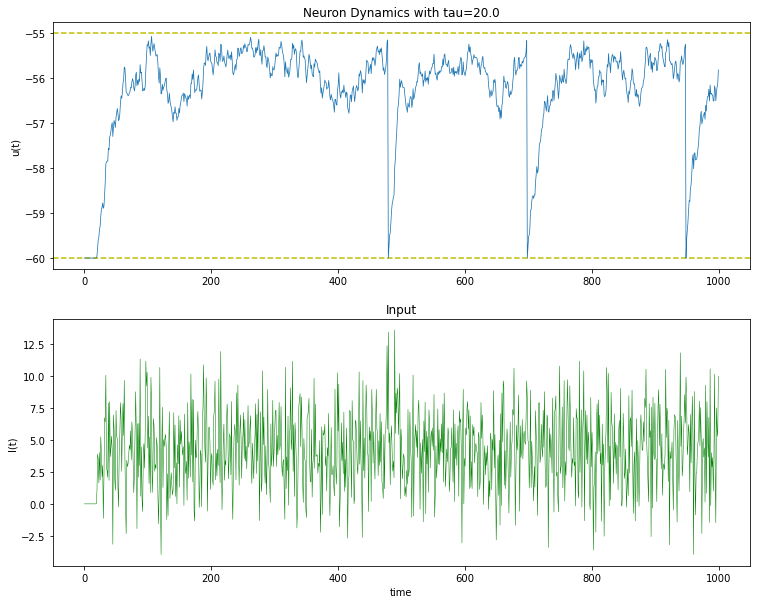

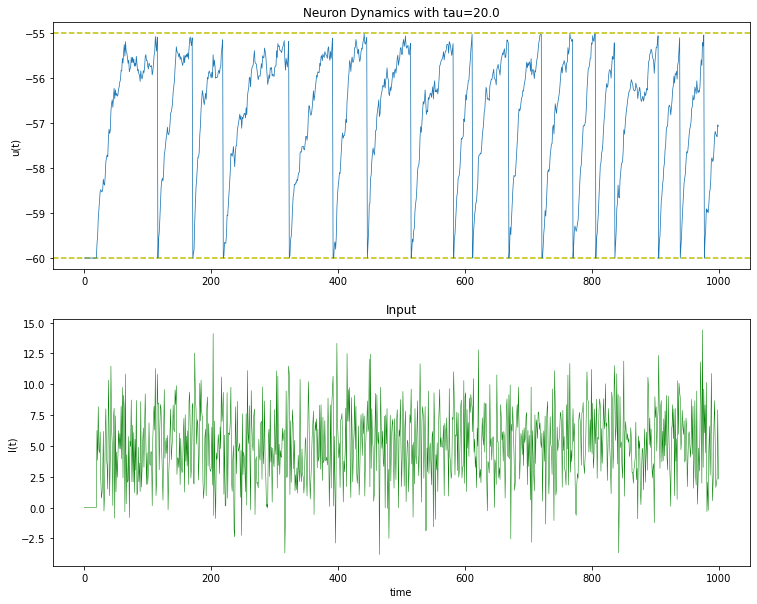

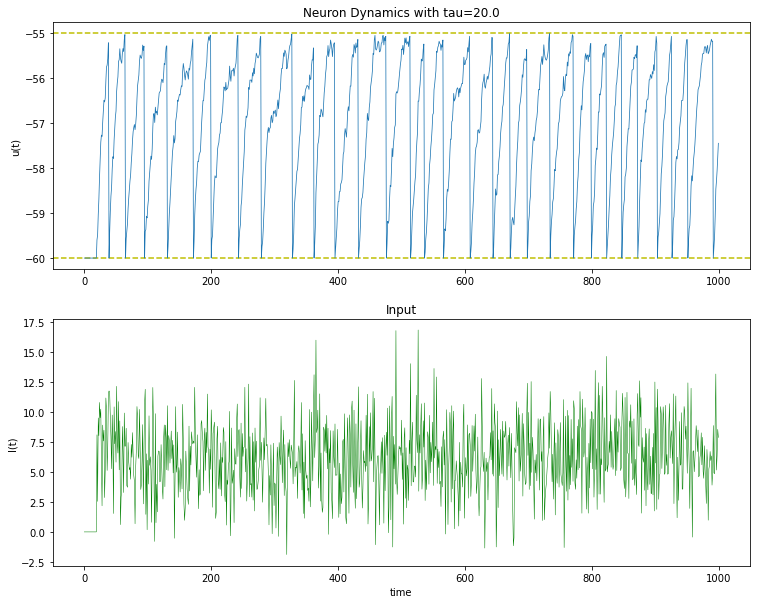

In [9]:
%matplotlib inline
if save_monitor_states:
    for i in range(0, len(monitor_states)):
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor)

The above simulations with different amounts of noise shows that the chance of
getting a spike will increase as the noise increases. With a base value of 4,
in the case of $\sigma_n=1.5$, we got only 1 spike. However, we got 5 spikes with the same
base value and $\sigma_n=3$.

## Simulation with neuron_params_2
$\tau = 20$, $|u_r - threshold| = 10mV$

### Without noise

In [10]:
step_currents = np.linspace(8, 32, 13, dtype=np.float32)
neuron_params_2 = {'threshold': -50, 'u_rest': -60, 'tau': 20}
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_2,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=zero_percent
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 4.123s
Currents: [ 8. 12. 16. 20. 24. 28. 32.]
frequencies: [  0  29  50  71  91 110 124]


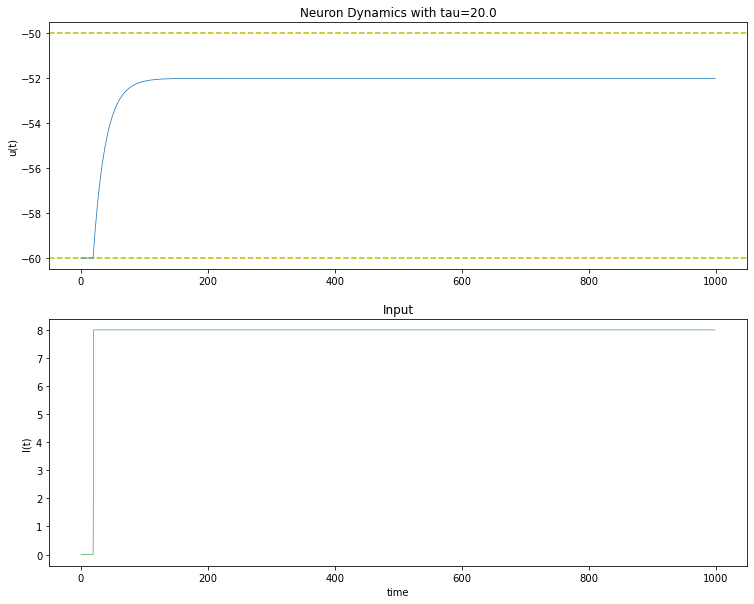

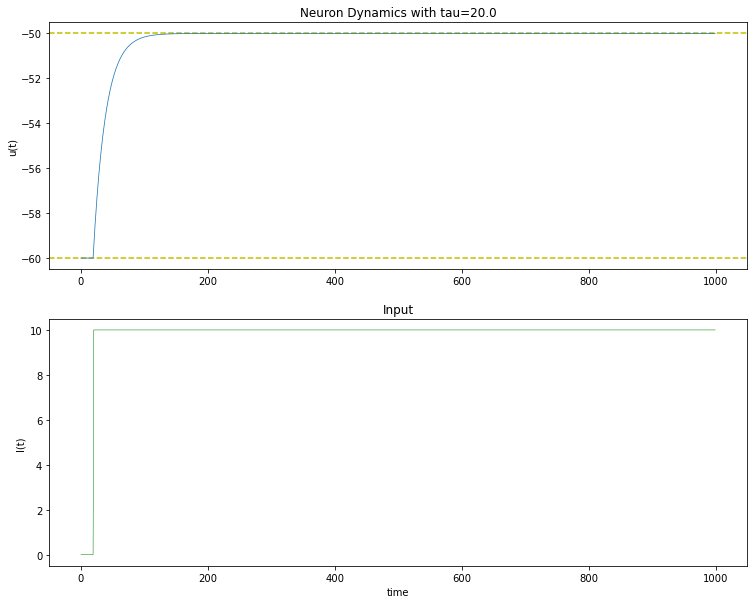

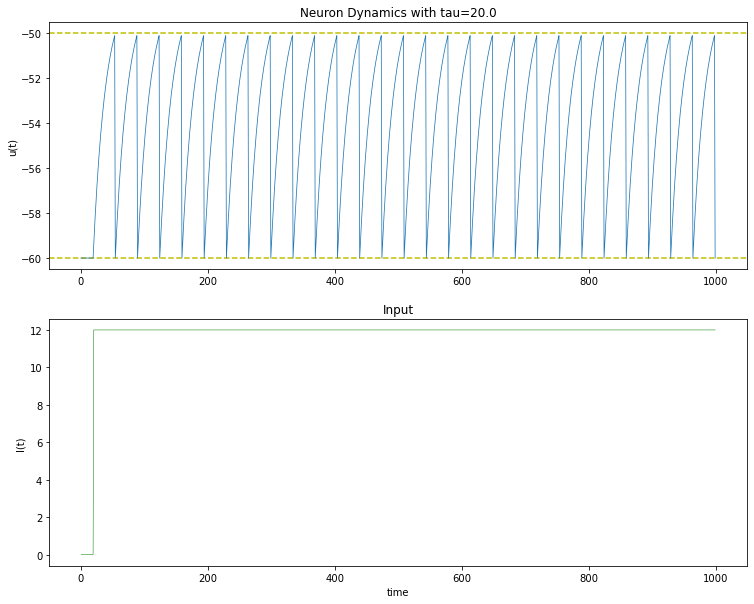

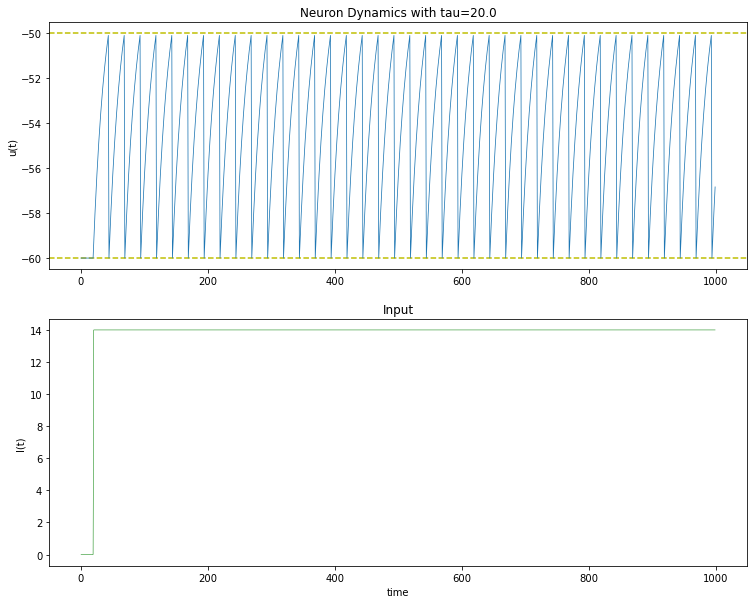

In [11]:
%matplotlib inline
if save_monitor_states:
    for i in range(4):
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor)

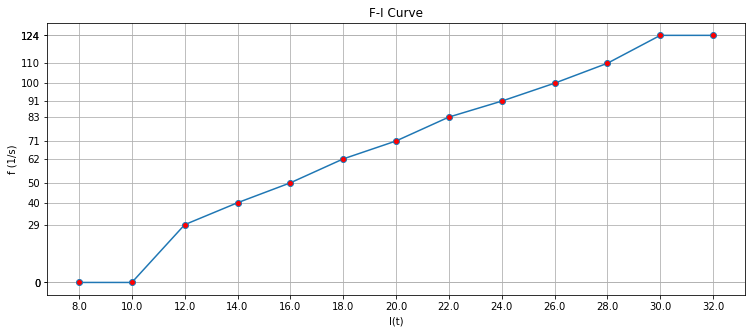

In [12]:
%matplotlib inline
fi_curve(currents, frequencies)

From the above simulations, we conclude that only the difference of
$u_r$ and $threshold$ is important. If we double their difference
(in our examples we doubled the difference from 5 to 10),
the input currents should also be doubled to achieve the same result. Therefore,
this relationship is linear.

### With noise: $\sigma_n = 1.5$

In [13]:
step_currents = np.linspace(8, 16, 5, dtype=np.float32)
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_2,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=zero_percent,
        line_slop=5e-4,
        noise_std=1.5
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 1.441s
Currents: [ 8. 12. 16.]
frequencies: [ 0 30 52]


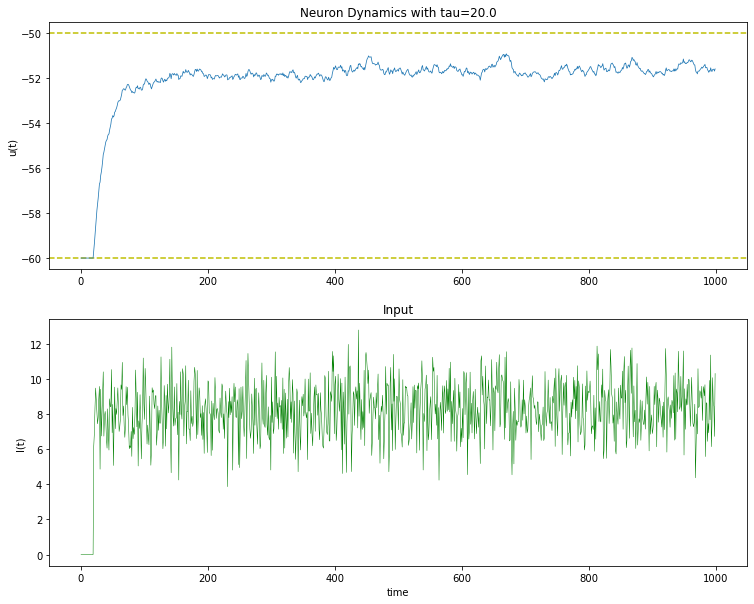

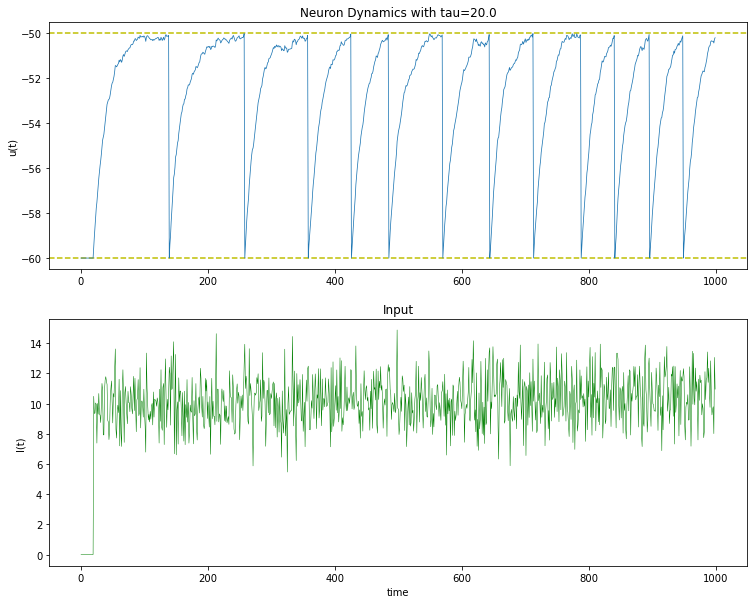

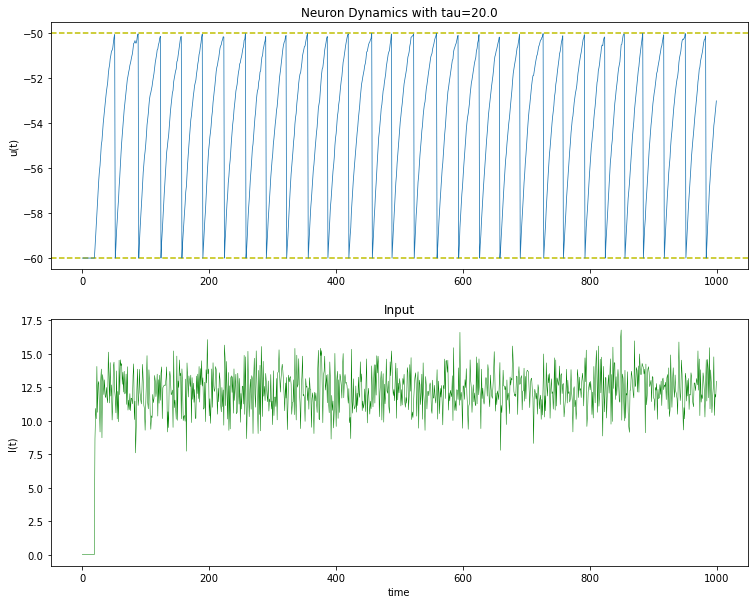

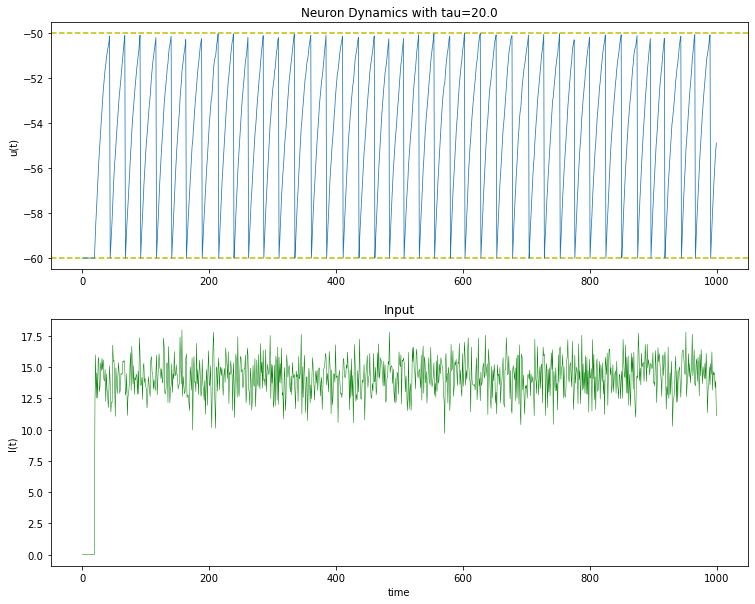

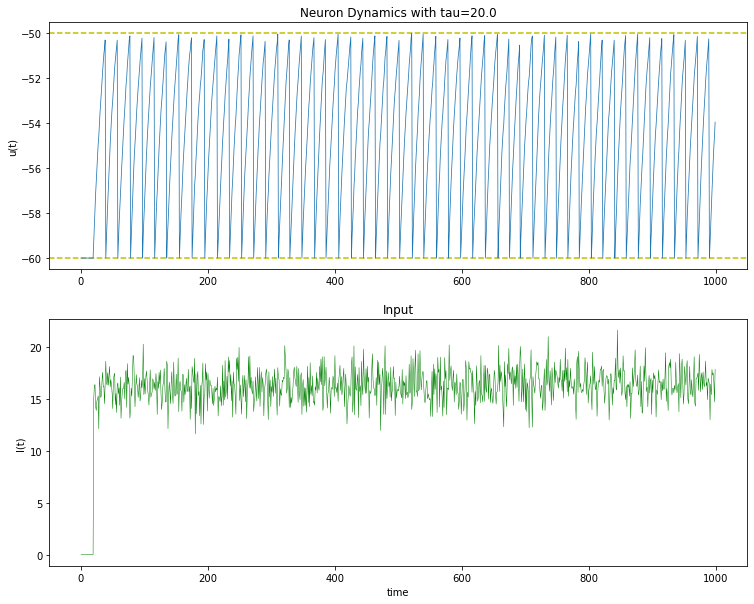

In [14]:
%matplotlib inline
if save_monitor_states:
    for i in range(0, len(monitor_states)):
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor)

### With noise: $\sigma_n = 3$

In [15]:
step_currents = np.linspace(4, 10, 5, dtype=np.float32)
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_2,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=zero_percent,
        line_slop=5e-4,
        noise_std=3
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 1.513s
Currents: [ 4.  7. 10.]
frequencies: [ 0  0 16]


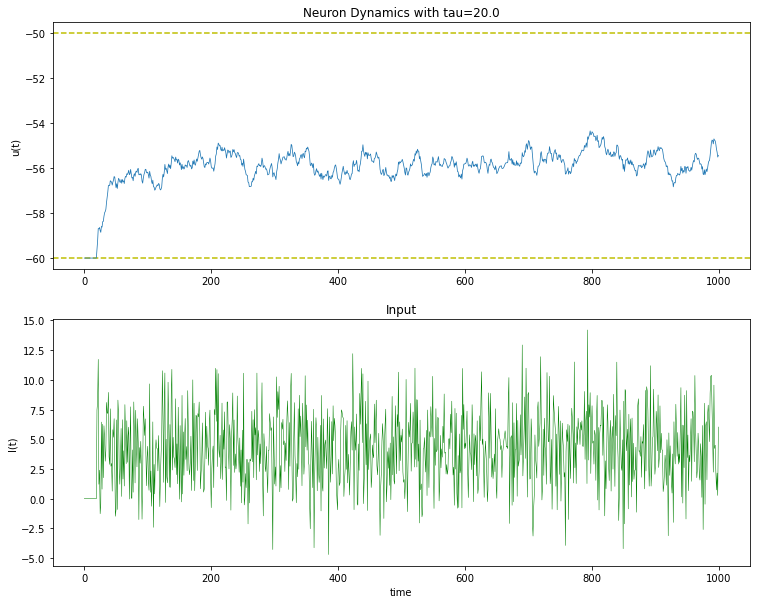

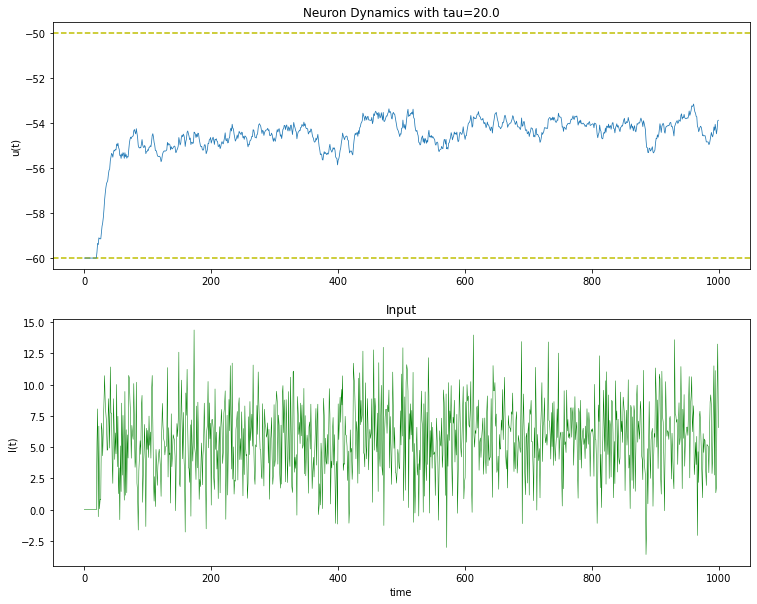

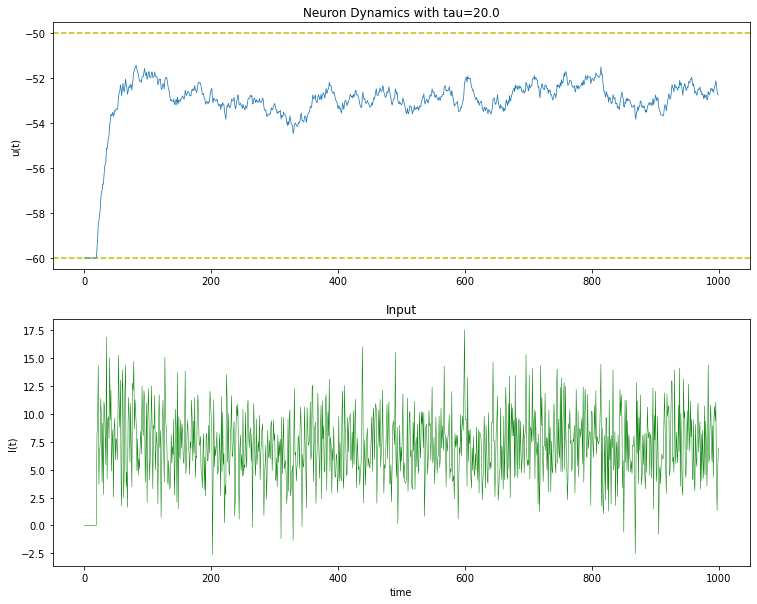

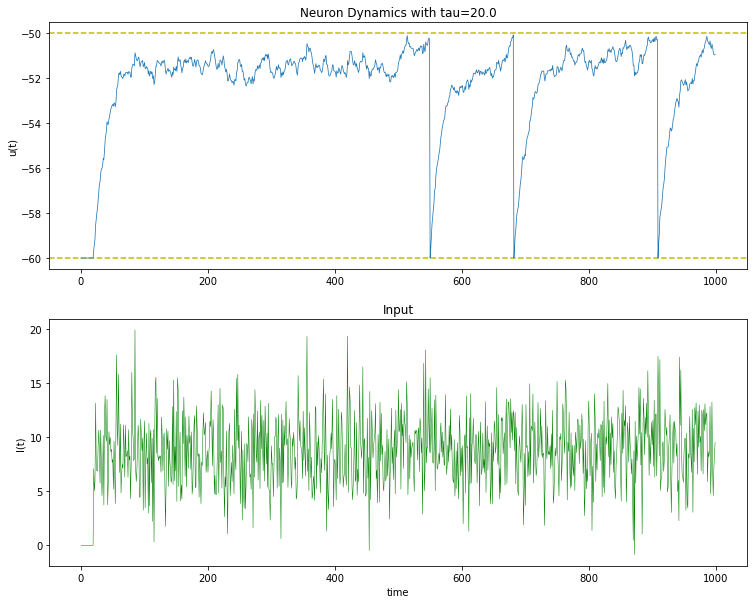

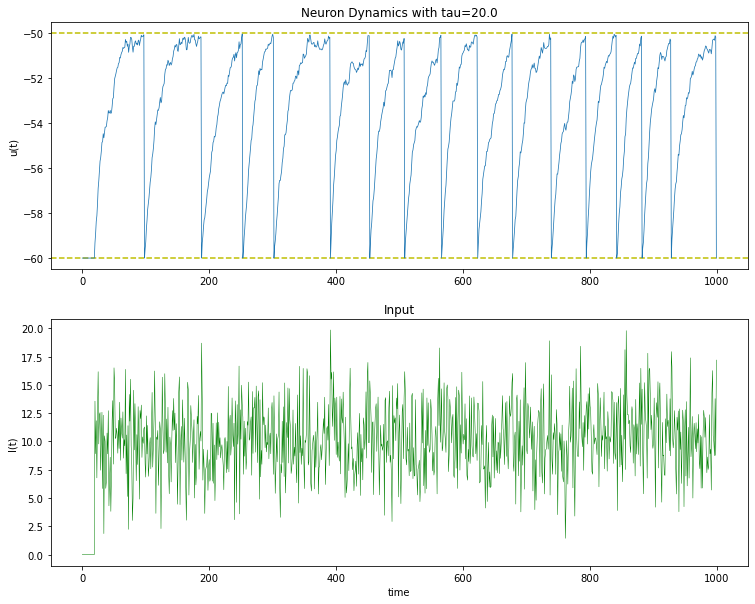

In [16]:
%matplotlib inline
if save_monitor_states:
    for i in range(0, len(monitor_states)):
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor)

By comparing the params_1 and params_2 output with noisy inputs, we can see that
the second parameter set is more robust to noisy input. 

Explanation: Since the noise has a normal distribution, its effect will be lowered
if it takes longer for the neuron to reach its threshold.

**neuron_params_3 and neuron_params_4 are experimenting the effect of $\tau$**

## Simulation with neuron_params_3
$\tau = 40$, $|u_r - threshold| = 5mV$

### without noise

In [17]:
step_currents = np.linspace(4, 16, 13, dtype=np.float32)
neuron_params_3 = {'threshold': -55, 'u_rest': -60, 'tau': 40}
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_3,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=zero_percent
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 3.845s
Currents: [ 4.  6.  8. 10. 12. 14. 16.]
frequencies: [ 0 13 26 36 45 55 66]


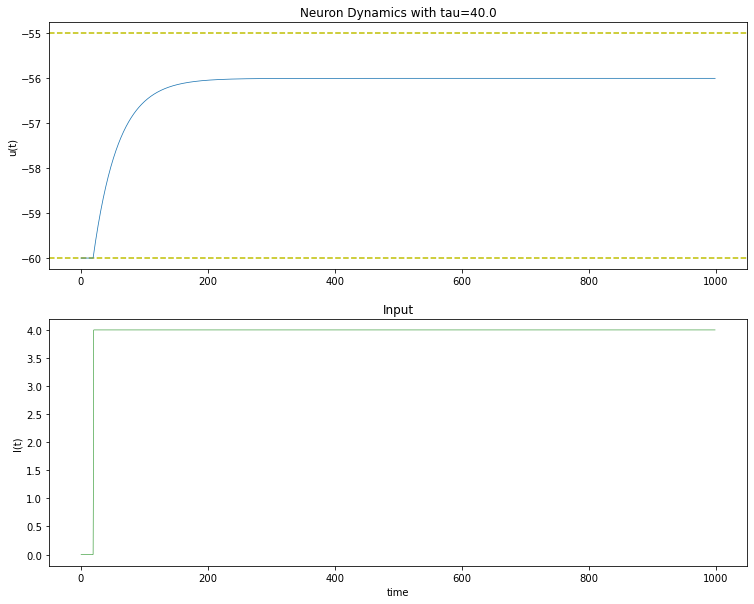

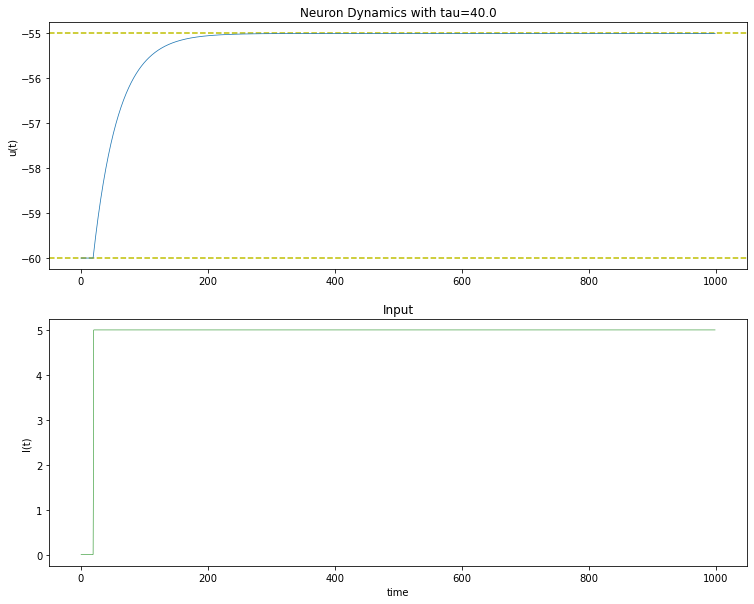

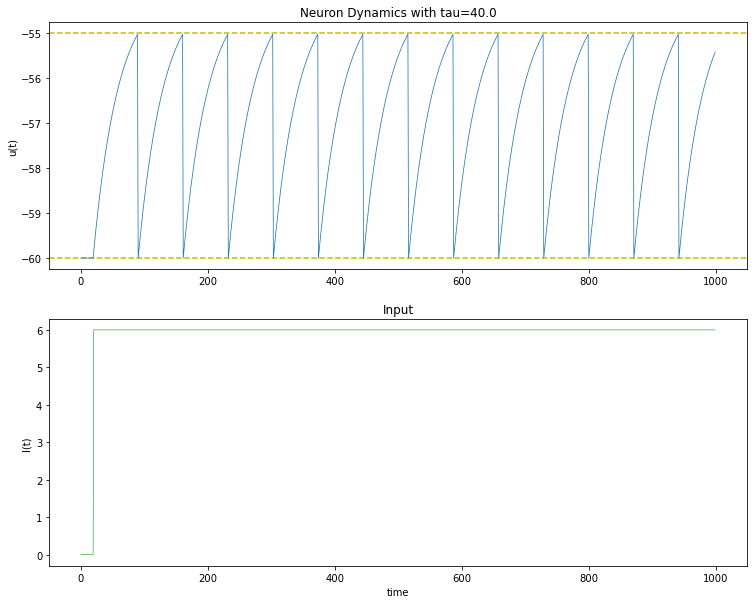

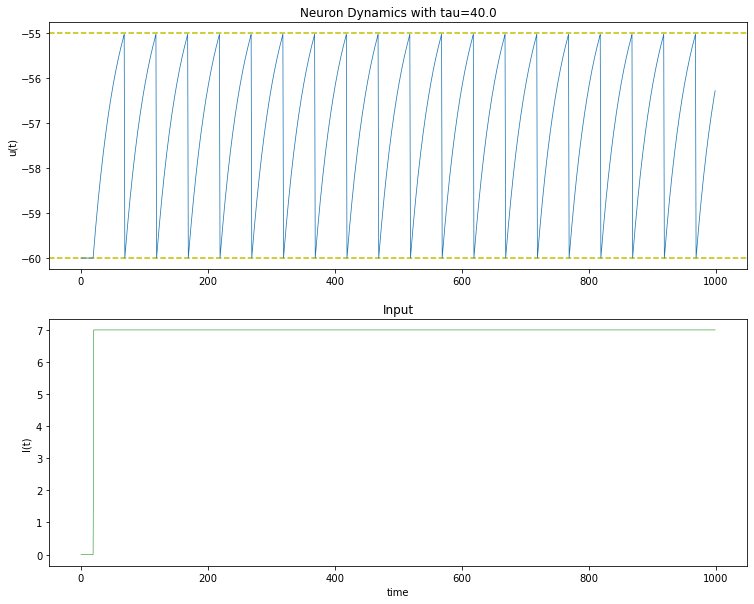

In [18]:
%matplotlib inline
if save_monitor_states:
    for i in range(4):
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor)

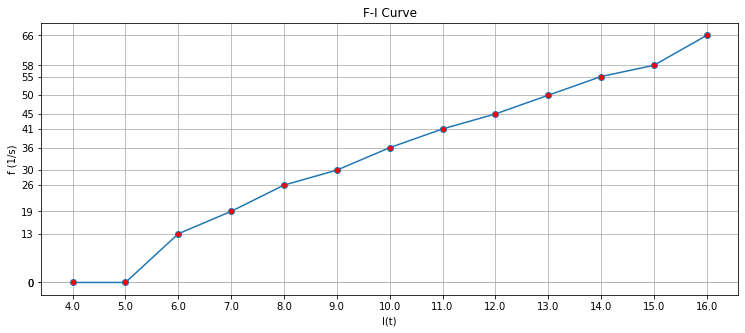

In [19]:
%matplotlib inline
fi_curve(currents, frequencies)

By comparing the **F_I curve** of this simulation and the first simulation,
we observe that the frequency of the spikes almost (not exactly in some cases)
will be halved if we double the tau. So, spike-frequency and the tau are inversely
proportional. Considering the update rule $u(t+\Delta) = u(t) - \Delta/\tau[(u(t) - u_r) - R.I(t)]$
it is obvious why this is the case. If we increase $\tau$, the update term will be decreased
by a factor of $1/\tau$. In other words, if we double $\tau$, the time we  update
the $u(t)$ should almost (because $u(t)$ itself appears in the update term)
be doubled if we want to achieve the same potential.

### With noise: $\sigma_n = 1.5$

In [20]:
step_currents = np.linspace(4, 8, 5, dtype=np.float32)
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_3,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=zero_percent,
        line_slop=5e-4,
        noise_std=1.5
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 1.466s
Currents: [4. 6. 8.]
frequencies: [ 0 15 27]


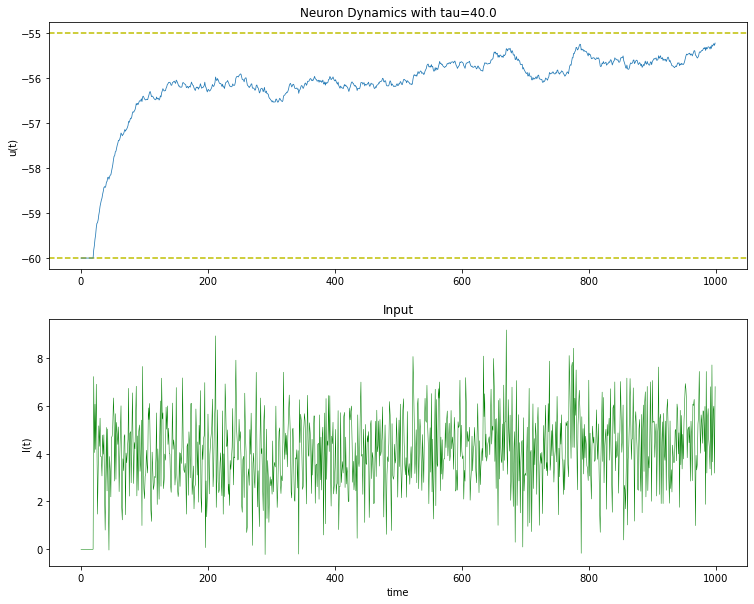

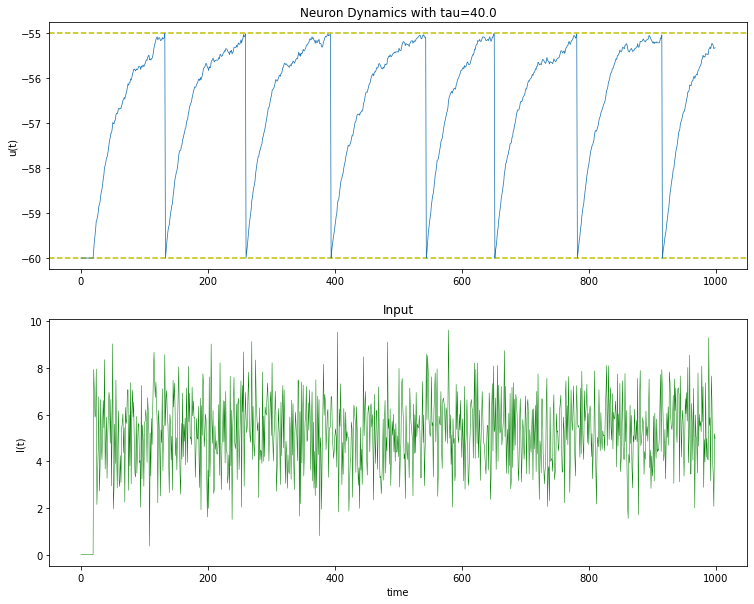

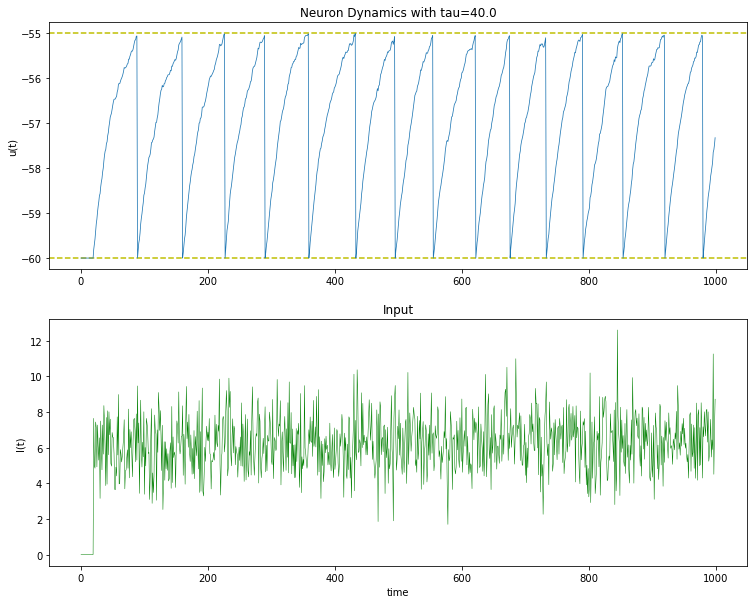

In [21]:
%matplotlib inline
if save_monitor_states:
    for i in range(len(monitor_states) - 2):
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor)

### With noise: $\sigma_n = 3$

In [22]:
step_currents = np.linspace(4, 8, 5, dtype=np.float32)
neuron_params_3 = {'threshold': -55, 'u_rest': -60, 'tau': 40}
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_3,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=zero_percent,
        line_slop=5e-4,
        noise_std=3
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 1.505s
Currents: [4. 6. 8.]
frequencies: [ 1 15 27]


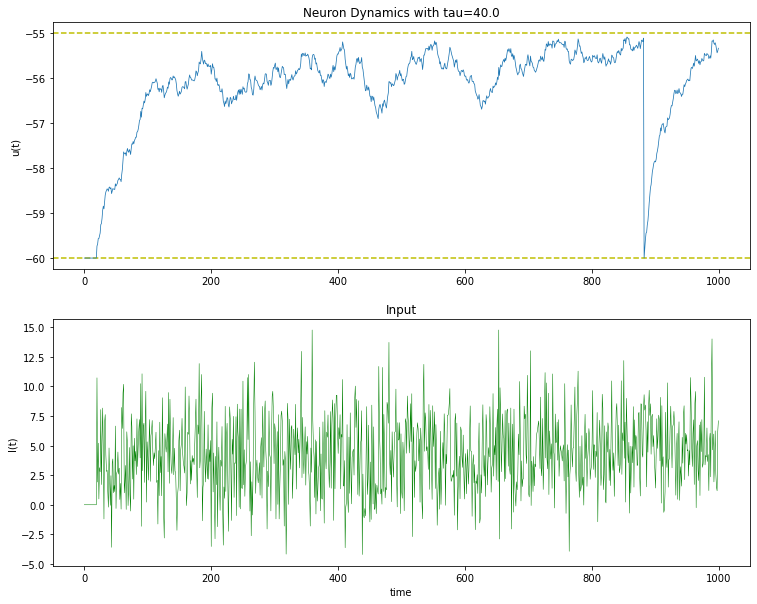

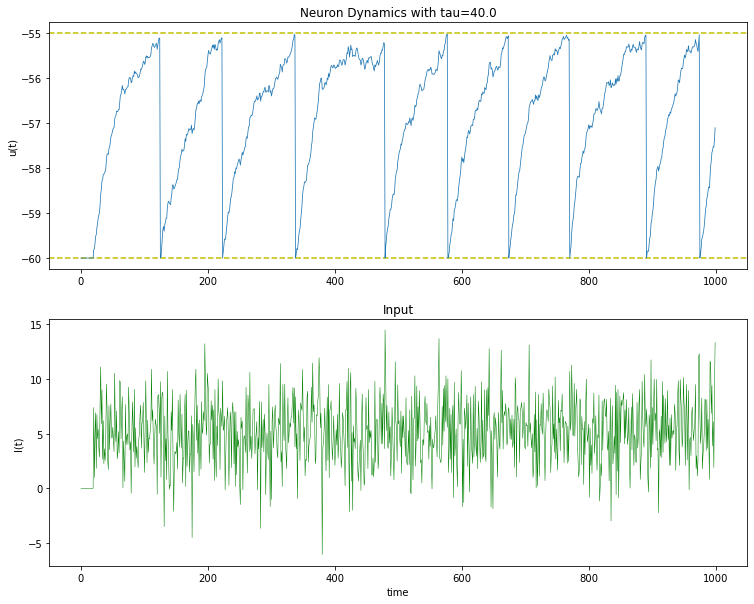

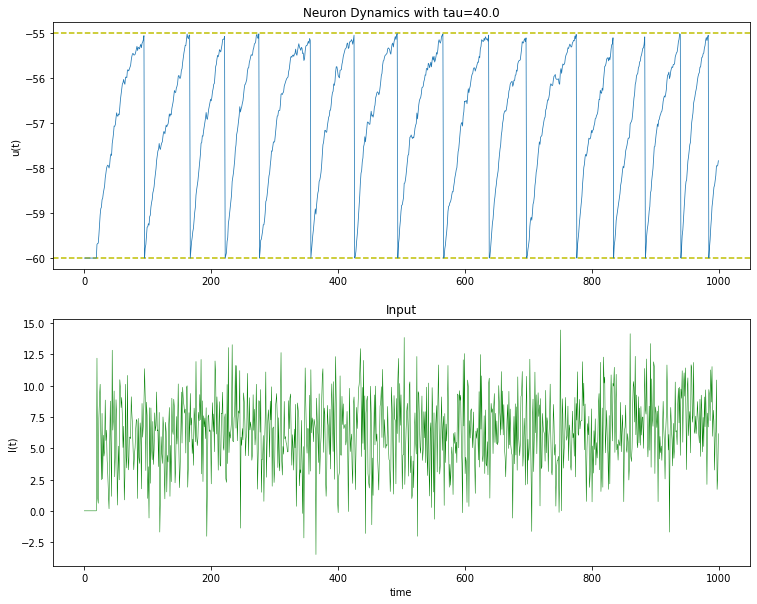

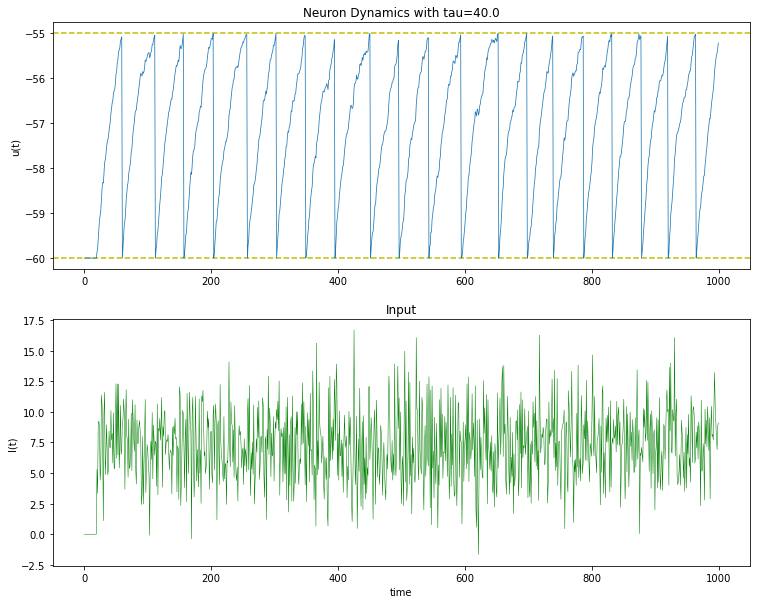

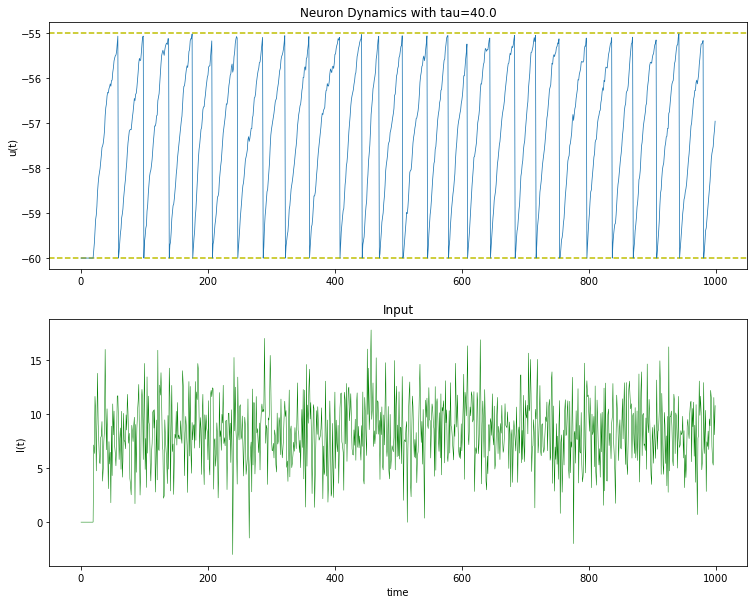

In [23]:
%matplotlib inline
if save_monitor_states:
    for i in range(len(monitor_states)):
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor)

## Simulation with neuron_params_4
$\tau = 10$, $|u_r - threshold| = 5mV$

### without noise

In [24]:
neuron_params_4 = {'threshold': -55, 'u_rest': -60, 'tau': 10}
step_currents = np.linspace(4, 16, 13, dtype=np.float32)
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_4,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=zero_percent
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 3.866s
Currents: [ 4.  6.  8. 10. 12. 14. 16.]
frequencies: [  0  55 100 143 166 200 250]


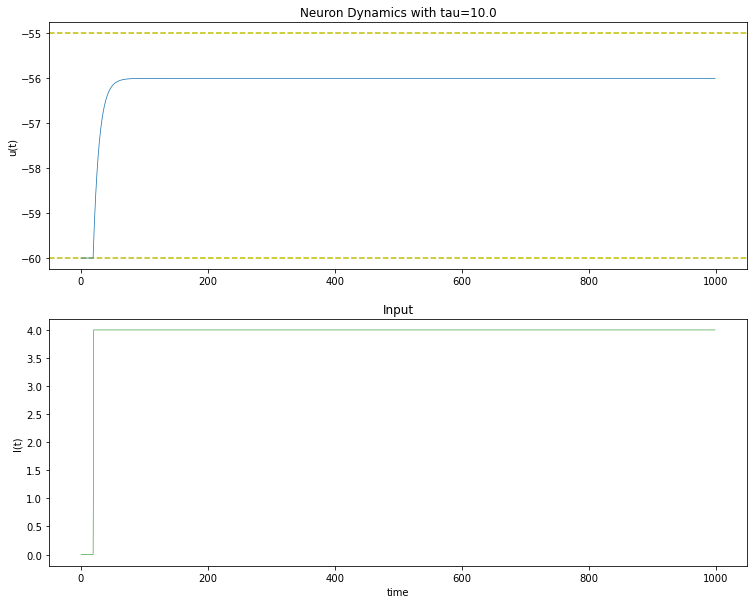

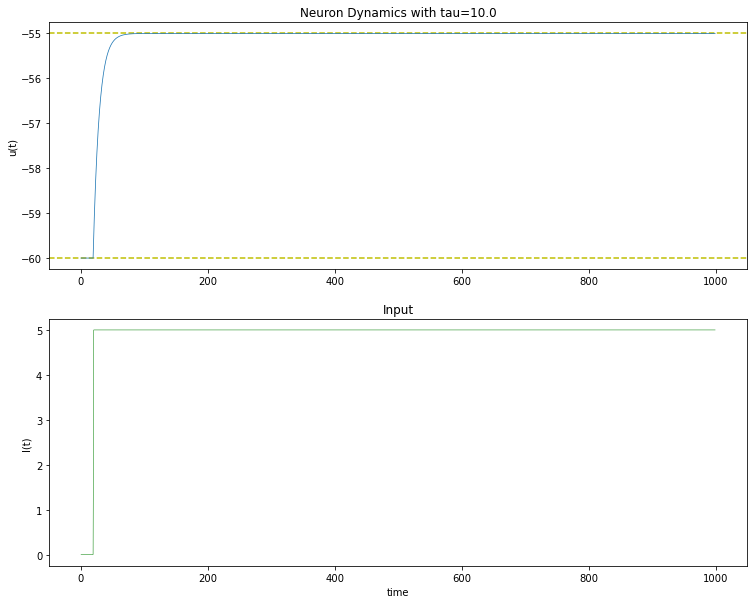

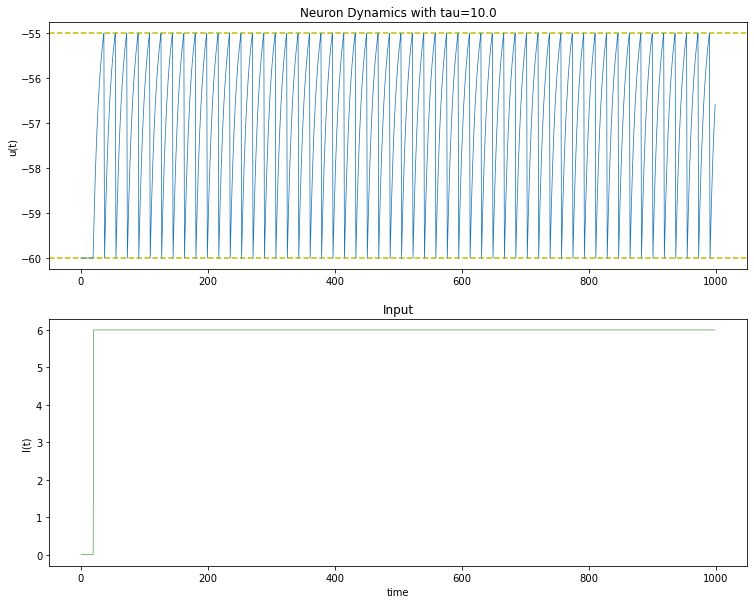

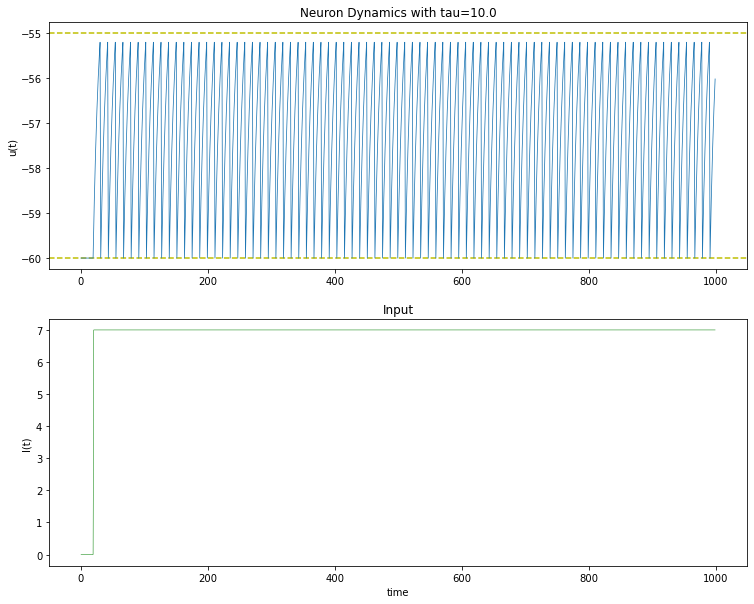

In [25]:
%matplotlib inline
if save_monitor_states:
    for i in range(4):
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor)

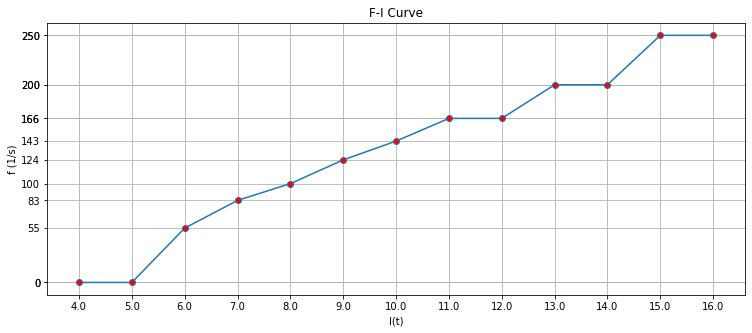

In [26]:
%matplotlib inline
fi_curve(currents, frequencies)

Similarly, If we halve the value of $\tau$, the output frequency will be almost doubled.
In other words, if we decrease the value of $\tau$, the neuron reaches the threshold faster.

### With noise: $\sigma_n = 1.5$

In [27]:
step_currents = np.linspace(4, 8, 5, dtype=np.float32)
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_4,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=zero_percent,
        line_slop=5e-4,
        noise_std=1.5
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 1.494s
Currents: [4. 6. 8.]
frequencies: [  7  62 105]


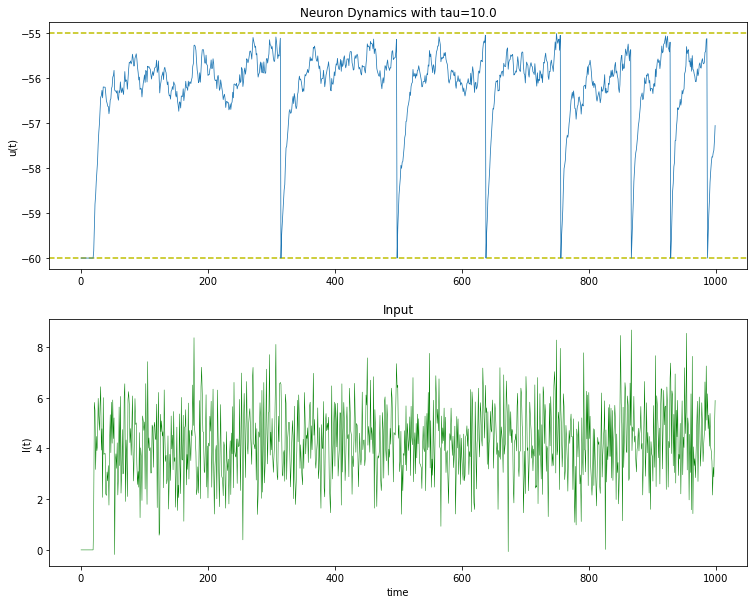

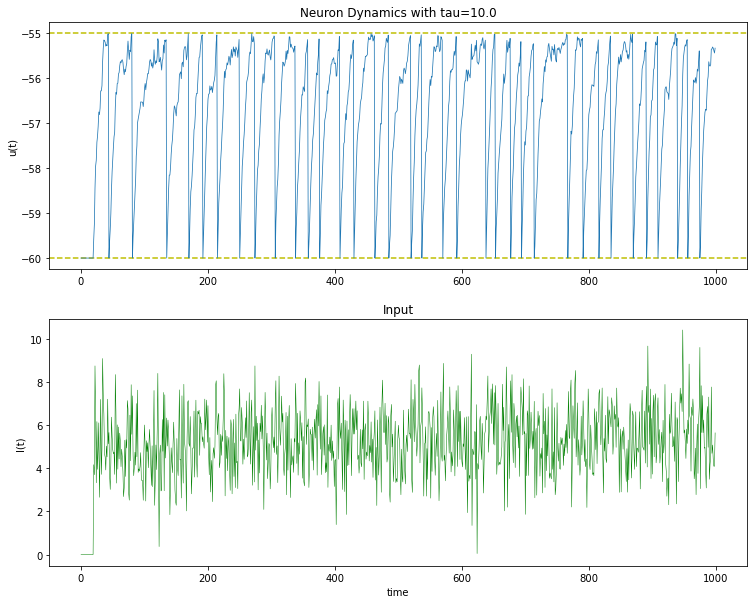

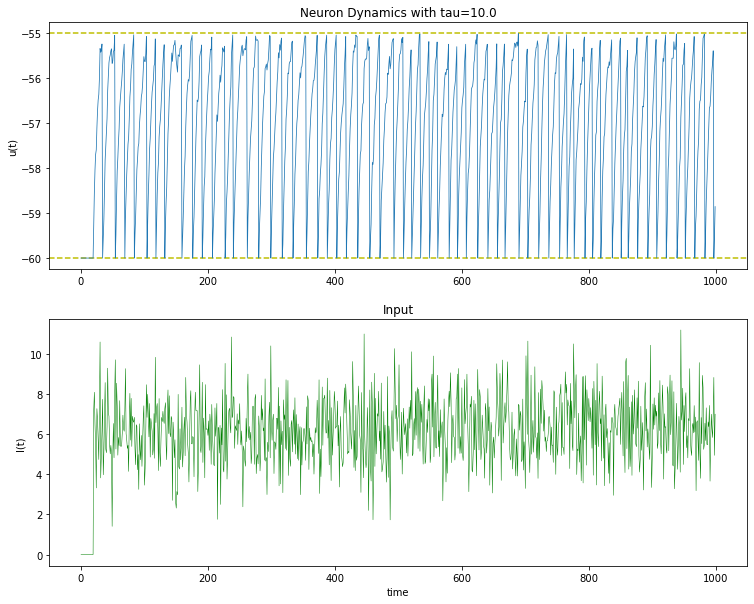

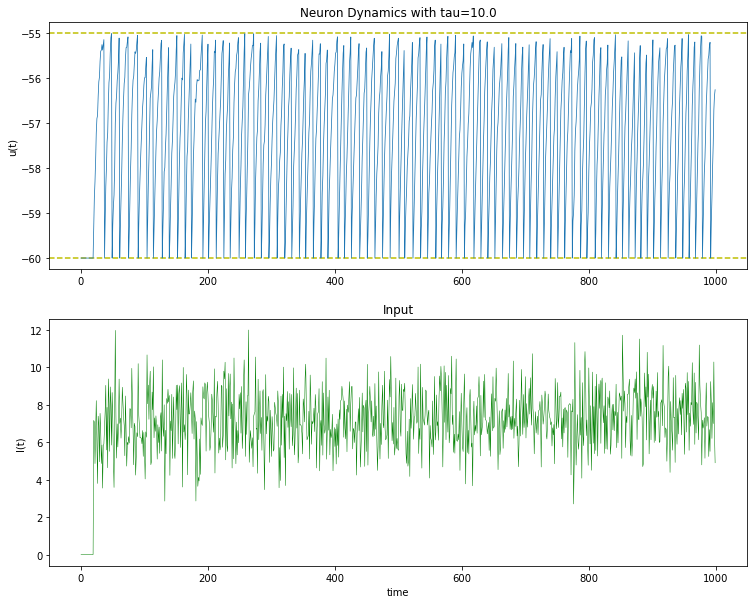

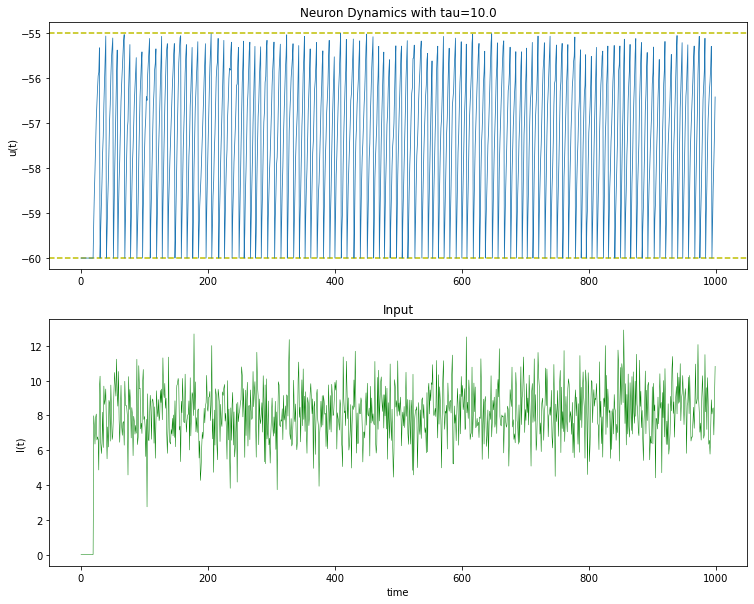

In [28]:
%matplotlib inline
if save_monitor_states:
    for i in range(len(monitor_states)):
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor)

### With noise: $\sigma_n = 3$

In [29]:
step_currents = np.linspace(4, 8, 5, dtype=np.float32)
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_4,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=zero_percent,
        line_slop=5e-4,
        noise_std=3
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 1.459s
Currents: [4. 6. 8.]
frequencies: [ 18  63 105]


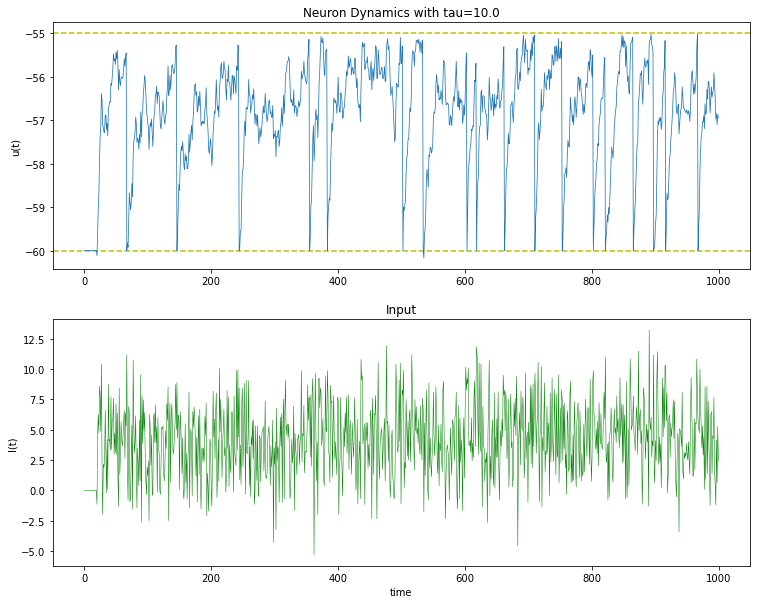

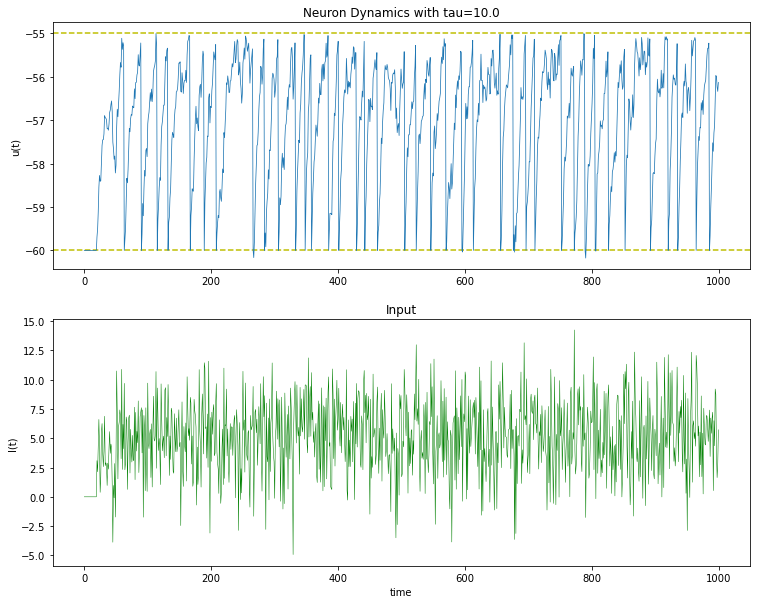

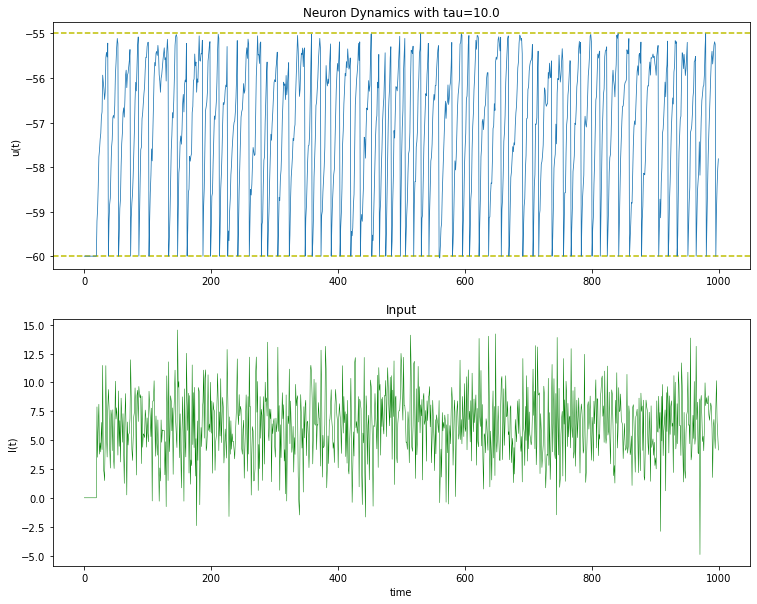

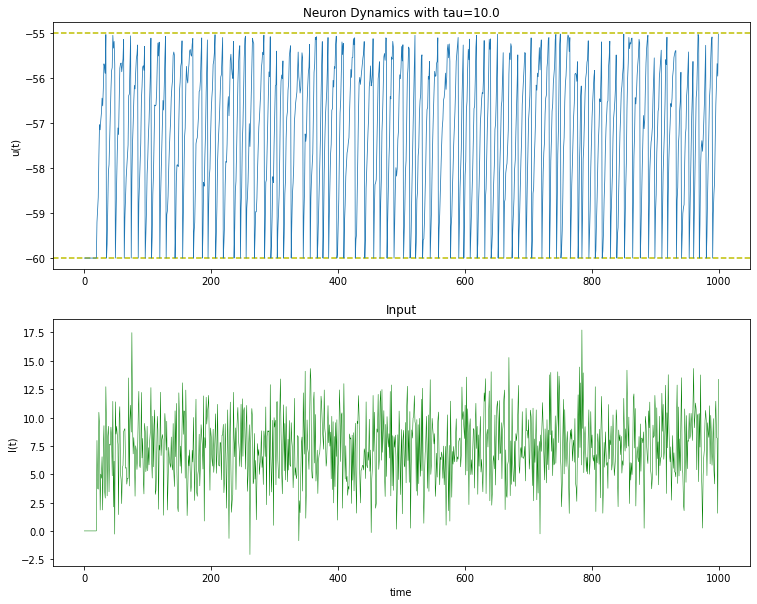

In [30]:
%matplotlib inline
if save_monitor_states:
    for i in range(4):
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor)


By comparing the results from the simulations with $\tau=10$ and $\tau=40$, we can 
clearly see that higher values of $\tau$ will cause the noise to be dampened to some
extent. With lower values of $\tau$, the effect of noise is more visible in the output.
This could be explained by the **update rule**. By increasing the value of $\tau$
we actually are lowering the effect of noise in the output, because we are
dividing the update terms by $\tau$.

## Simulation with neuron_params_5
$\tau = 20$, $|u_r - threshold| = 5mV$, $r = 2$

### without noise

If we consider the update rule, it is clear that the effect of increasing the value
of $r$ is just like increasing the input value. So, in the below simulation,
we halve the input values and set $r=2$ to achieve the same result as with
**neuron_params_5**.

In [31]:
neuron_params_5 = {'threshold': -55, 'u_rest': -60, 'tau': 20, 'r': 2}
step_currents = np.linspace(2, 8, 13, dtype=np.float32)
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_5,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=zero_percent
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 3.911s
Currents: [2. 3. 4. 5. 6. 7. 8.]
frequencies: [  0  29  50  71  91 110 124]


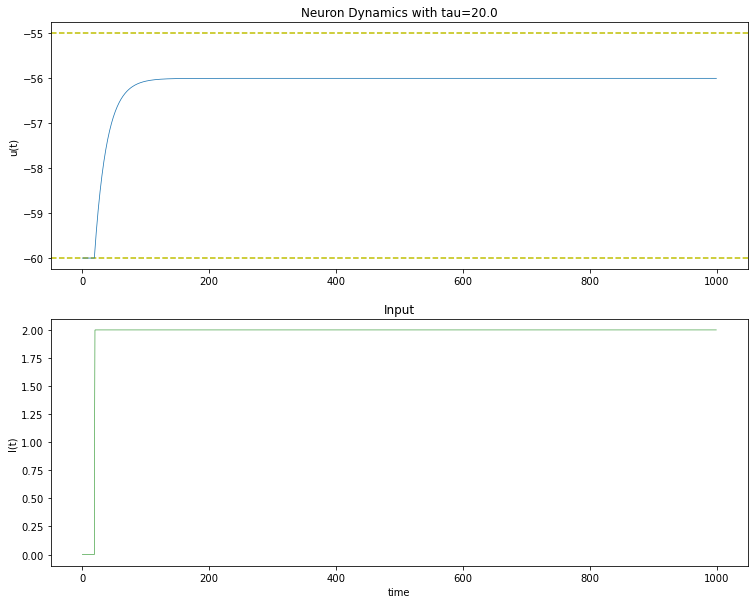

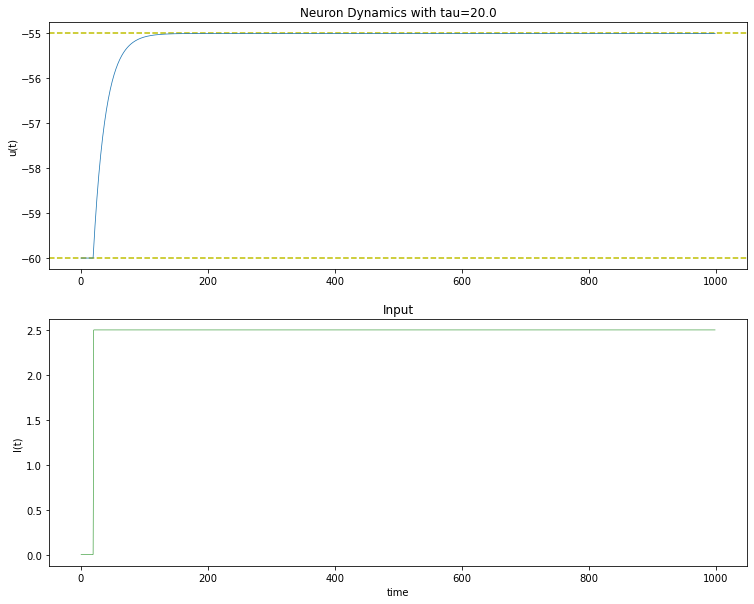

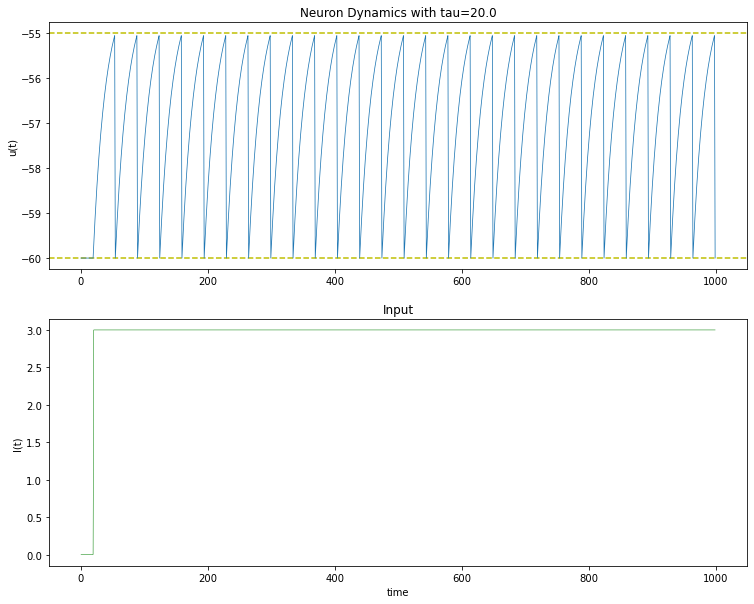

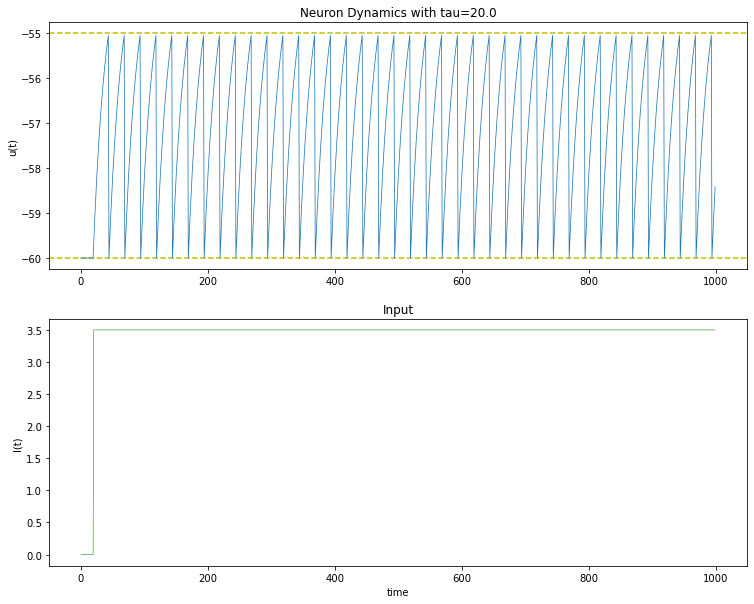

In [32]:
%matplotlib inline
if save_monitor_states:
    for i in range(4):
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor)

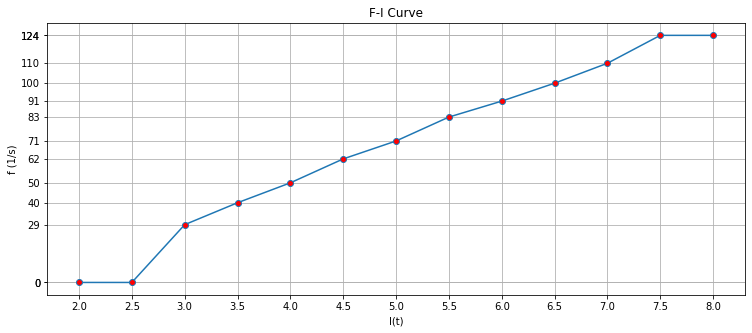

In [33]:
%matplotlib inline
fi_curve(currents, frequencies)

Since the effect of changing $r$ is linear to the output, we do not run the 
simulations with noisy inputs. It is clear that by increasing $r$, we should 
have lower amounts of $\sigma_n$ to get the same result.

## Summary of observations:

1. Higher values of input increases the spikes' frequency.
2. The slope of FI-Curve is high at the beginning, then it tends to be lower. Also, for some
different (but close) values of input, the frequency do not change. Maybe if we
increase the simulation time, the difference would show up.
3. By increasing $|u_r - threshold|$ the input should also be increased, if we
want to get the same frequency (relation between $|u_r - threshold|$, and the input
intensity is **linear** in this case).
4. The higher amounts of noise tend to increase the spikes' frequency in some cases.
Also, the noise in the potential curve will be increases as well.
5. Higher values of $\tau$ will dampen the effect of noise. Therefore, if the input's
noise is large, the model with a larger value of $\tau$ tend to perform better.
In other words, it is more robust to noise.
6. Increasing $r$ will increase the effect of noise in the output as it will increase
the $\sigma_n$ felt by the neuron.
7. Also, increasing $|u_r - threshold|$ will dampen the effect of noise. It is
because neuron takes a longer time to reach its threshold, therefore; the noise
effect would be lower (assuming the noise distribution is normal).
8.  $\tau$ and the spikes' frequency are almost inversely proportional.